# `sequgen` demo

This demo shows how to create a timeseries with sequgen. Before we can run the software, we first need to to load a few packages.

In [1]:
from matplotlib import pyplot as plt
import numpy
from sequgen.deterministic.triangular_peak import triangular_peak
from sequgen.parameter_space import ParameterSpace
from sequgen.dimension import Dimension

## Time series with static parameters

The time series will consist of two parts: the time points and the data points. For the time points we want to use space between the numbers 0 and 20. We want to divide that space in 100 equal sections so we need 101 points: 100 at the beginning of each section and 1 and the end of the final section. We can define these time points with this command:

In [2]:
time_points = numpy.linspace(start=0, stop=20, num=101)

We can verify that this process has worked by checking the contents of the variable `time_points`:

In [3]:
time_points

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
        2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
        4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
        6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
        8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8,
       11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. ,
       13.2, 13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2,
       15.4, 15.6, 15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4,
       17.6, 17.8, 18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6,
       19.8, 20. ])

In this time space, we want to create a triangulary shaped signal starting at time point 5 at value 0, rising to value 1 at time point 6 and dropping back to value 0 at time point 10. The following command can achieve this:

In [4]:
data_points = triangular_peak(time_points, **{'height': 1, 'placement': 6, 'width_base_left': 1, 'width_base_right': 4})

So we have asked for a triangular peak with height 1, placed at time position 6, where the left part of the triangle has width 1 (so it starts at 5) and the right part has width 4 (so it ends at time point 10). We can check the contents of the variable `data_points` to verify that the command has worked:

In [5]:
data_points

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.4 ,
       0.6 , 0.8 , 1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.65, 0.6 ,
       0.55, 0.5 , 0.45, 0.4 , 0.35, 0.3 , 0.25, 0.2 , 0.15, 0.1 , 0.05,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  ])

We notice that the standard value of the data points is zero. Only at the triangle that we have defined the values are non-zero. A graph provides a better view of the shape:

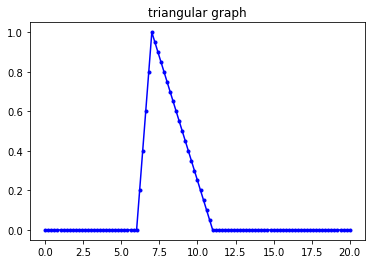

In [6]:
def plot(time_points, data_points, title):
    plt.figure()
    plt.plot(time_points, data_points, ".b-")
    plt.title(title)
    plt.show()

title = "triangular graph"
plot(time_points, data_points, title)

## Time series with random parameters

Often, we want to to allow for some variance in the signal. For example, we could have the height of the peak vary between 1 and 2, the peak position could vary between 3 and 10, the left width of the triangle could vary between 0.5 and 1, and the right width of the triangle could vary between 4 and 6. We can define these variations in a parameter space:

In [7]:
parameter_space = ParameterSpace([
    Dimension("height", 1, 2),
    Dimension("placement", 3, 10),
    Dimension("width_base_left", 0.5, 1),
    Dimension("width_base_right", 4, 6),
])

Next, we generate a set of arbitrary values based on this parameter space:

In [8]:
parameters = parameter_space.sample()

We can verify that the parameter value generation was successful by checking the value of the `parameters` variable:

In [9]:
parameters

{'height': 1.0918637838415952,
 'placement': 4.6254030311596175,
 'width_base_left': 0.6145108647446988,
 'width_base_right': 5.594328900386932}

Each time you run the `sample` command, you will get a different set of values. The parameters can be used to create new data points:

In [10]:
variable_data_points = triangular_peak(time_points, **parameters)

And the graph that corresponds with these data points can then be plotted. This time we mention the parameter values in the title of the graph:

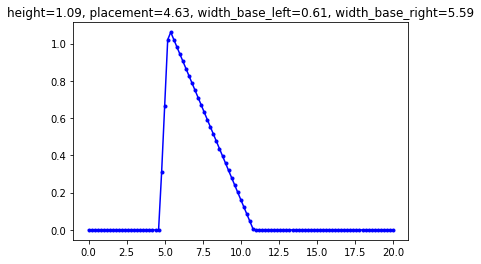

In [11]:
title = parameter_space.format_str().format(**parameters)
plot(time_points, variable_data_points, title)

Notice that this graph might have a slightly different shape than the previous one. This depends on the position of the peak. Only when the position of the peak (parameter `placement`) coincides with a time point, will the signal shape be perfectly triangular. But since the peak position now is an arbitrary value, this is usually not the case. And when the peak position does not match a time point, the triangle can be slightly irregular at the top.